# The Sparks Foundation
# Task 2- Color Recognition
# Author- Aditi Mondal
# 


**Importing necessary libraries** 

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Define image** 

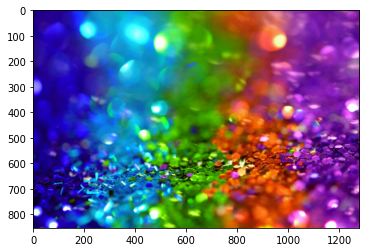

In [3]:
img_path='bright1.jpeg'
img=cv2.imread(img_path)
plt.imshow(img)
plt.show()


In [4]:
index=['color','color_name','hex','R','G','B']
csv=pd.read_csv('colors.csv',names=index,header=None)

**Global Variable** 

In [5]:
clicked=False
r=g=b=xpos=ypos=0

**Color recognition** 

In [6]:
def recognize_color(R,G,B):
    minimum= 10000
    for i in range(len(csv)):
        d=abs(R- int(csv.loc[i,'R']))+ abs(G-int(csv.loc[i,'G']))+abs(B-int(csv.loc[i,'B']))
        if(d<= minimum):
            minimum=d
            cname =csv.loc[i,'color_name']
    return cname
 
    

**Mouse Click Function** 

In [7]:
def mouse_click(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos,clicked
        clicked=True
        xpos=x
        ypos=y
        b,g,r=img[y,x]
        b=int(b)
        g=int(g)
        r=int(r)
        

**Application Window**

In [8]:
cv2.namedWindow('color Recognition App')
cv2.setMouseCallback('color Recognition App',mouse_click)

while(1):
    cv2.imshow('color Recognition App',img)
    if (clicked):
        #cv2.rectangle(image,startpoint,endpoint,color,thickness)-1 fills entire rectangle
        cv2.rectangle(img,(20,20),(750,60),(b,g,r),-1)
# creating text string to display (color name and RGB values)
        text= recognize_color(r,g,b)+'R=' + str(r)+'G='+ str(g) +'B='+ str(b)
# cv2.putText(img,text,start,font(0-7),fontscale,color,thickness,lineType)
        cv2.putText(img,text,(50,50),2,0.8,(255,255,255),2,cv2.FONT_HERSHEY_SIMPLEX)
# For very light colors we will display text in black color 
        if (r+g+b>=600):
            cv2.putText(img,text,(50,50),2,0.8,(0,0,0),2,cv2.FONT_HERSHEY_SIMPLEX)
            clicked=False
    if cv2.waitKey(20) & 0xFF == 27:
        break 
        
cv2.destroyAllWindows()